In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

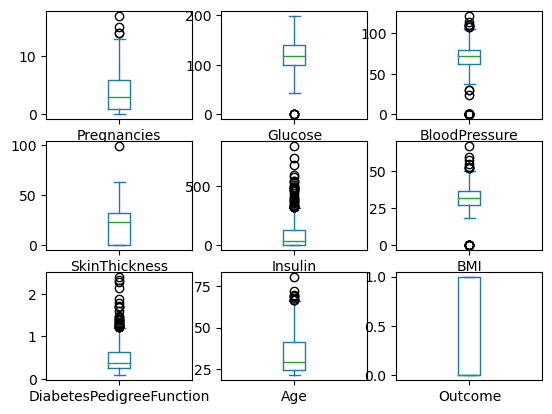

In [7]:
data.plot(kind='box',subplots = True,layout=(3,3),sharex=False,sharey=False)
plt.show()

In [8]:
col = list(data.columns)

In [9]:
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

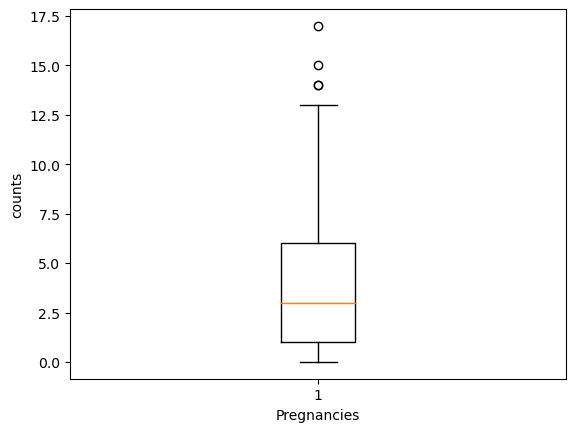

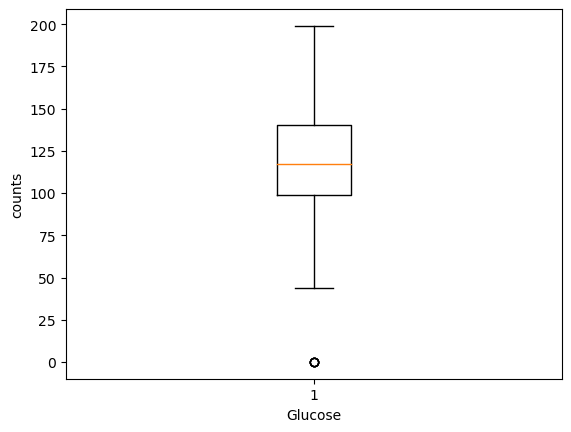

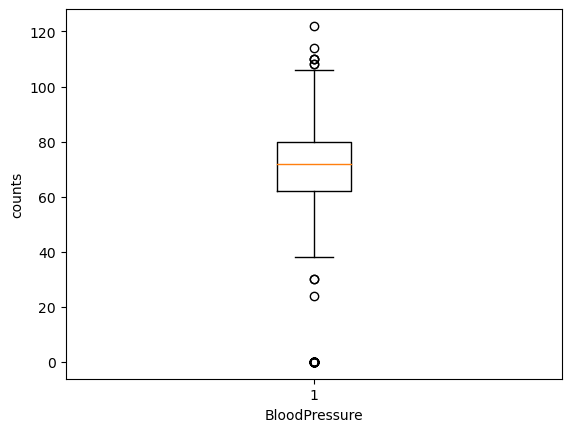

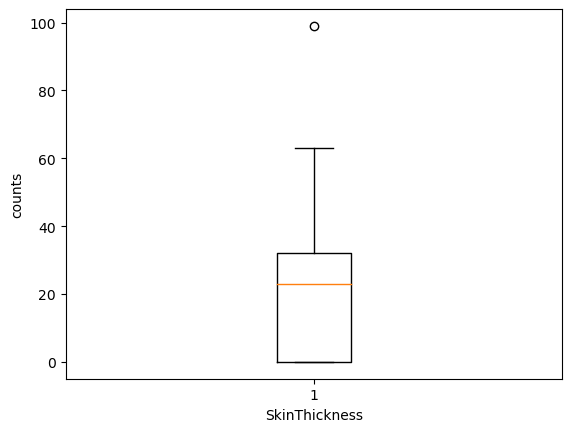

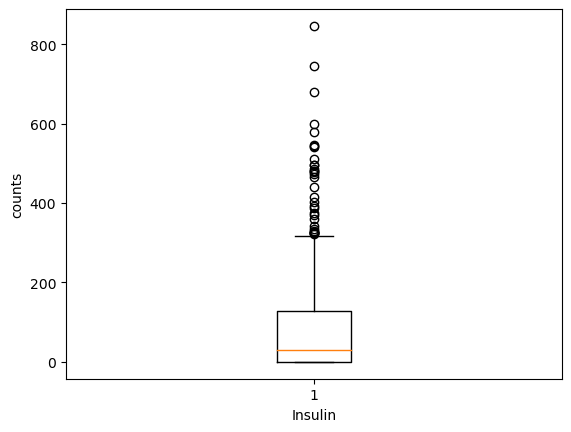

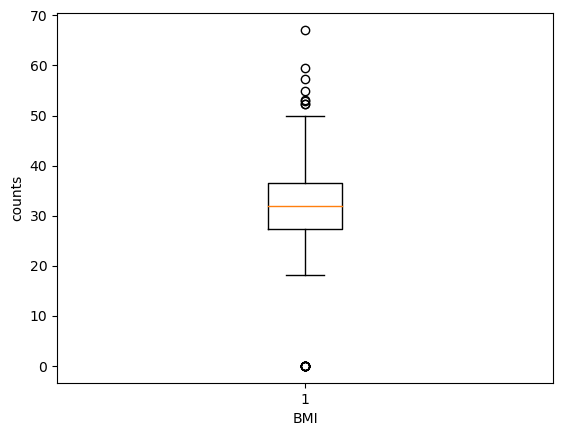

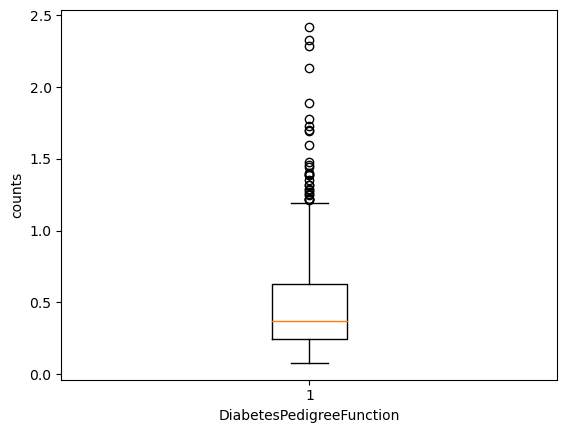

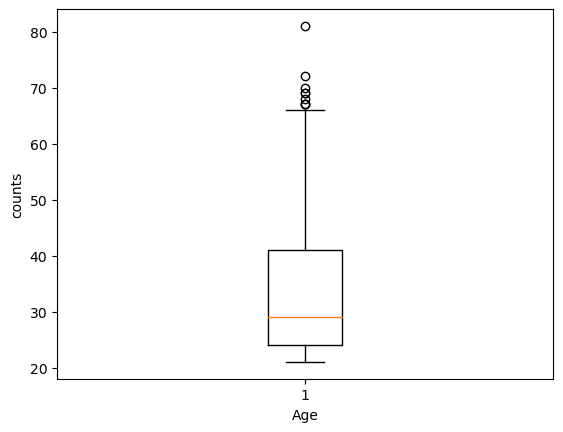

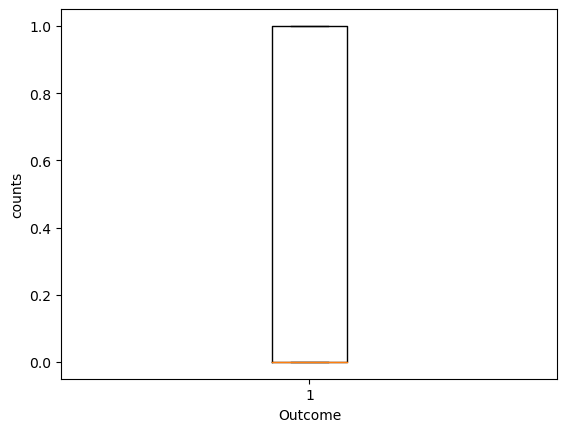

In [10]:
for i in col:
    if(data[i].dtype=='int64' or data[i].dtype=='float64'):
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [11]:
Q1 = data.SkinThickness.quantile(0.25)
Q3 = data.SkinThickness.quantile(0.75)

IQR = Q3-Q1

In [12]:
# data = data[(data.BloodPressure>=Q1-1.5*IQR) & (data.BloodPressure<=Q3+1.5*IQR)]

In [13]:
# data

In [14]:
# spliting data
x = data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [15]:
print("shape of x = ",x.shape)
print("shape of y = ",y.shape)

shape of x =  (768, 8)
shape of y =  (768,)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
#determining shape of splitting dataset
print("shape of x_train = ",x_train.shape)
print("shape of x_test  = ",x_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_test  = ",y_test.shape)

shape of x_train =  (614, 8)
shape of x_test  =  (154, 8)
shape of y_train =  (614,)
shape of y_test  =  (154,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score

In [20]:
lr = LogisticRegression()

In [21]:
kfold = KFold(n_splits=10,random_state=1,shuffle=True)
cv_results = cross_val_score(lr,x_train,y_train,cv=kfold,scoring='accuracy')
print("%s : %f , %f ",lr,cv_results.mean(),cv_results.std())

%s : %f , %f  LogisticRegression() 0.767160232681121 0.03208665262256607


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [22]:
# !pip install pandas-profiling

In [23]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data,explorative = True, dark_mode=True)
# prof.to_file(output_file='output.html')

In [24]:
#importing libraries

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [25]:
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print("accuracy : ",accuracy_score(y_test,predictions))
print("confusion matrix:\n",confusion_matrix(y_test,predictions))
print("classification_report:\n",classification_report(y_test,predictions))

accuracy :  0.7857142857142857
confusion matrix:
 [[93  6]
 [27 28]]
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154

